In [37]:
import seaborn as sns
sns.set_style("ticks")
tips = sns.load_dataset("tips", cache=True)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


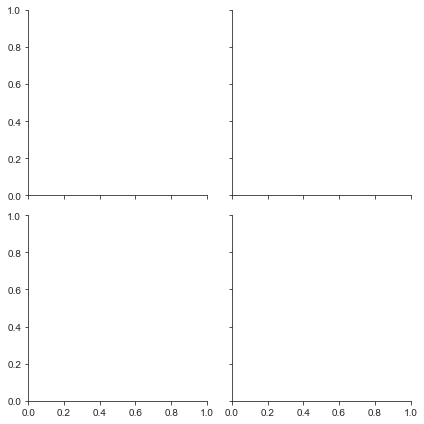

In [38]:
# Initialize a 2x2 grid of facets using the tips dataset:
g = sns.FacetGrid(data=tips, # 必须为DataFrame objects
                  col="time", row="smoker")

Figure(432x432)
smoker = Yes | time = Lunch

xlim (0.6829999999999994, 53.197)
ylim (0.0, 28.35)
[ 0. 10. 20. 30. 40. 50. 60.]
[]
smoker = Yes | time = Dinner

xlim (0.6829999999999994, 53.197)
ylim (0.0, 28.35)
[ 0. 10. 20. 30. 40. 50. 60.]
[]
smoker = No | time = Lunch
total_bill
xlim (0.6829999999999994, 53.197)
ylim (0.0, 28.35)
[ 0. 10. 20. 30. 40. 50. 60.]
[Text(0.0, 0, '0'), Text(20.0, 0, '20'), Text(40.0, 0, '40'), Text(60.0, 0, '60'), Text(0.8, 0, '0.8'), Text(1.0, 0, '1.0'), Text(0, 0, '')]
smoker = No | time = Dinner
total_bill
xlim (0.6829999999999994, 53.197)
ylim (0.0, 28.35)
[ 0. 10. 20. 30. 40. 50. 60.]
[Text(0.0, 0, '0'), Text(20.0, 0, '20'), Text(40.0, 0, '40'), Text(60.0, 0, '60'), Text(0.8, 0, '0.8'), Text(1.0, 0, '1.0'), Text(0, 0, '')]


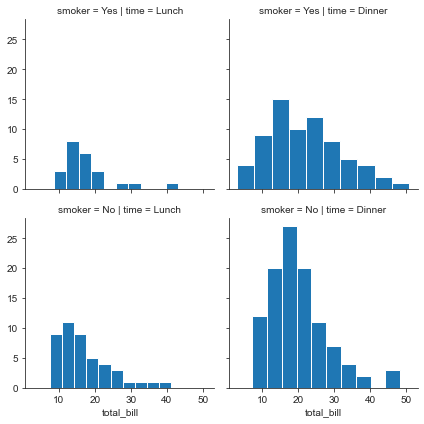

In [39]:
# Draw a univariate plot on each facet:
import matplotlib.pyplot as plt
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")
print(g.fig)
for i in g.fig.get_axes():
    print(i.get_title())
    print(i.get_xlabel())
    print('xlim', i.get_xlim())
    print('ylim', i.get_ylim())
    print(i.get_xticks())
    print(i.get_xticklabels())

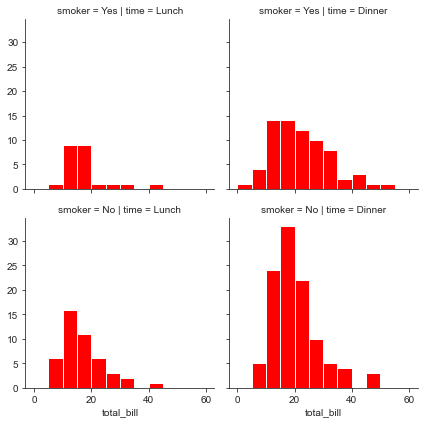

In [40]:
# Pass additional keyword arguments to the mapped function:
import numpy as np
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill", bins=bins, color="r")

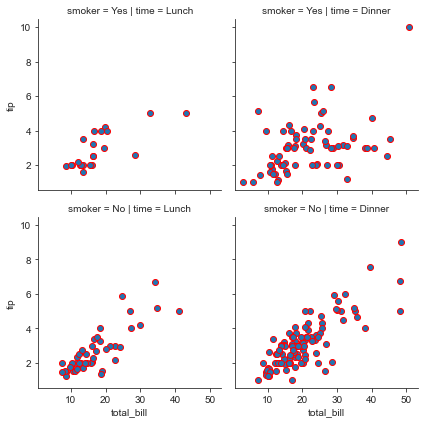

In [41]:
# Plot a bivariate function on each facet:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.scatter, "total_bill", "tip", edgecolor="r")

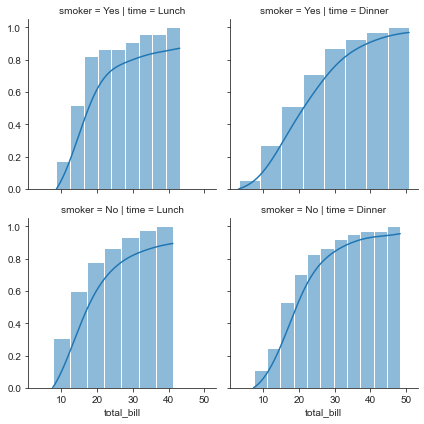

In [66]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(sns.histplot, "total_bill", cumulative=True, stat="density", kde=True)

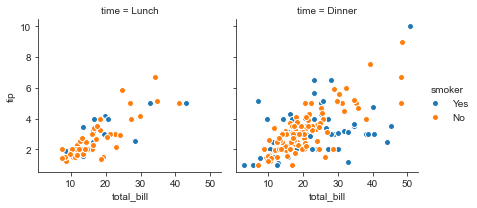

In [42]:
# Assign one of the variables to the color of the plot elements:
g = sns.FacetGrid(tips, col="time",  hue="smoker")
g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w")
       .add_legend())

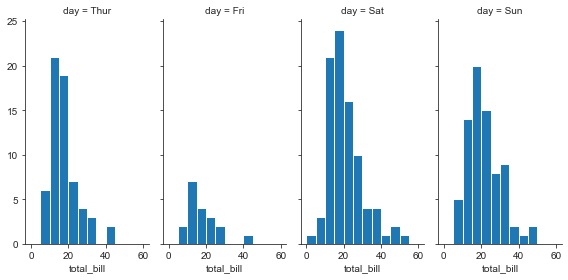

In [43]:
# Change the height and aspect ratio of each facet:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g = g.map(plt.hist, "total_bill", bins=bins)

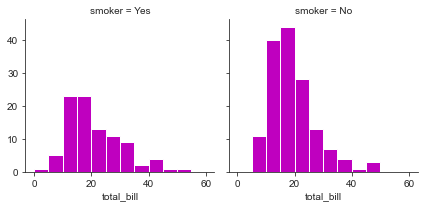

In [44]:
# Specify the order for plot elements:
g = sns.FacetGrid(tips, col="smoker", col_order=["Yes", "No"])
g = g.map(plt.hist, "total_bill", bins=bins, color="m")

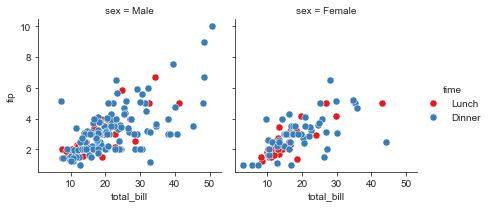

In [45]:
#Use a different color palette:
kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tips, col="sex", hue="time", palette="Set1",
                   hue_order=["Lunch", "Dinner"])
g = (g.map(plt.scatter, "total_bill", "tip", **kws)
      .add_legend())

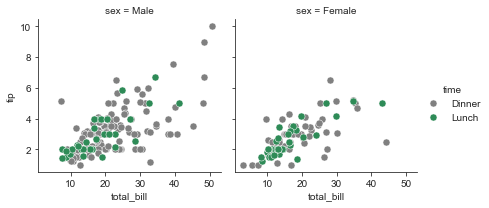

In [46]:
# Additionally use a different marker for the hue levels:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal,
                   hue_order=["Dinner", "Lunch"])
g = (g.map(plt.scatter, "total_bill", "tip", **kws)
      .add_legend())

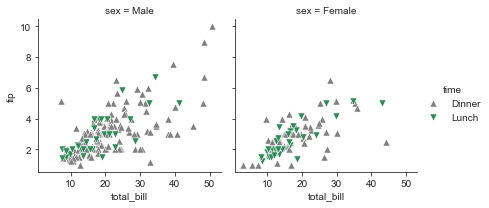

In [47]:
# Additionally use a different marker for the hue levels:
g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal,
                   hue_order=["Dinner", "Lunch"],
                   hue_kws=dict(marker=["^", "v"]))
g = (g.map(plt.scatter, "total_bill", "tip", **kws)
      .add_legend())

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


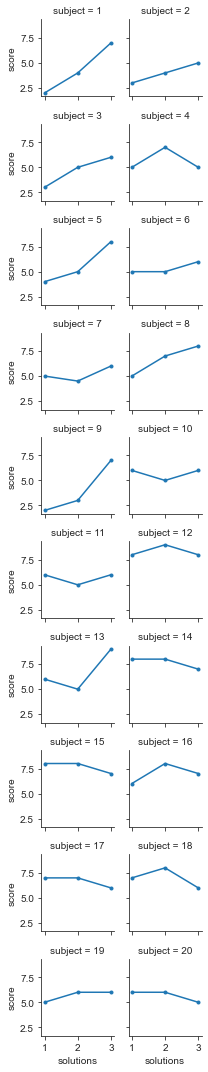

In [48]:
# “Wrap” a column variable with many levels into the rows:
att = sns.load_dataset("attention")
g = sns.FacetGrid(att, col="subject", col_wrap=2, height=1.5)
g = g.map(plt.plot, "solutions", "score", marker=".")
att.head()

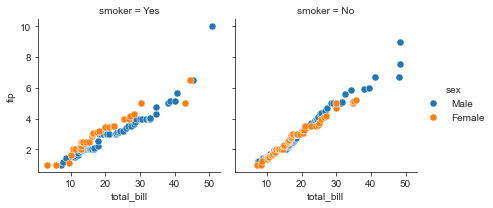

In [49]:
# Define a custom bivariate function to map onto the grid:
from scipy import stats
def qqplot(x, y, **kwargs):
     _, xr = stats.probplot(x, fit=False)
     _, yr = stats.probplot(y, fit=False)
     plt.scatter(xr, yr, **kwargs)
g = sns.FacetGrid(tips, col="smoker", hue="sex")
g = (g.map(qqplot, "total_bill", "tip", **kws)
       .add_legend())

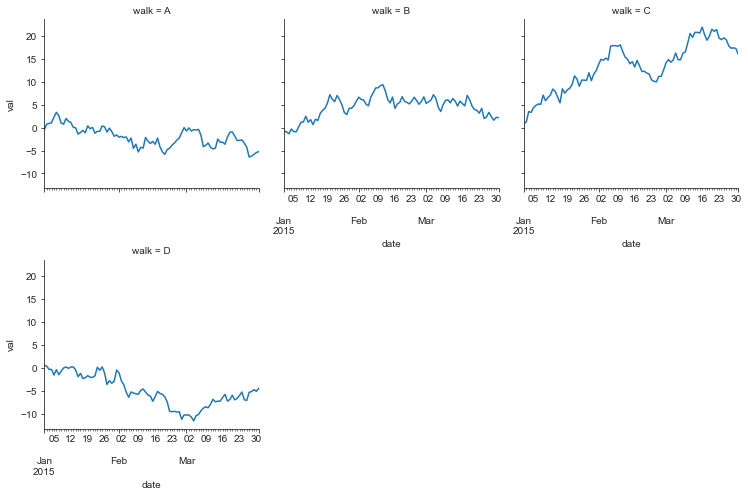

In [50]:
# Define a custom function that uses a DataFrame object and accepts column names as positional variables:
import pandas as pd
df = pd.DataFrame(
     data=np.random.randn(90, 4),
     columns=pd.Series(list("ABCD"), name="walk"),
     index=pd.date_range("2015-01-01", "2015-03-31",
                         name="date"))
df = df.cumsum(axis=0).stack().reset_index(name="val")
def dateplot(x, y, **kwargs):
     ax = plt.gca()
     data = kwargs.pop("data")
     data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
g = sns.FacetGrid(df, col="walk", col_wrap=3, height=3.5) #col_warp应设为大于1的整数
g = g.map_dataframe(dateplot, "date", "val")

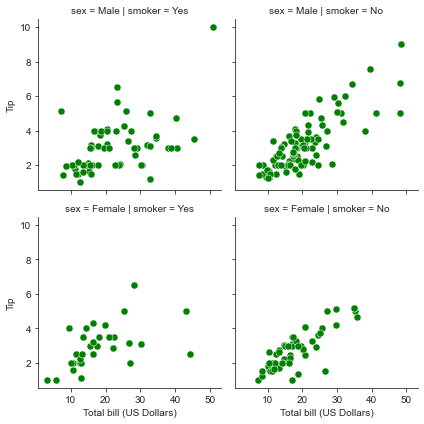

In [51]:
# use different axes labels after plotting:
g = sns.FacetGrid(tips, col="smoker", row="sex")
g = (g.map(plt.scatter, "total_bill", "tip", color="g", **kws)
       .set_axis_labels("Total bill (US Dollars)", "Tip"))

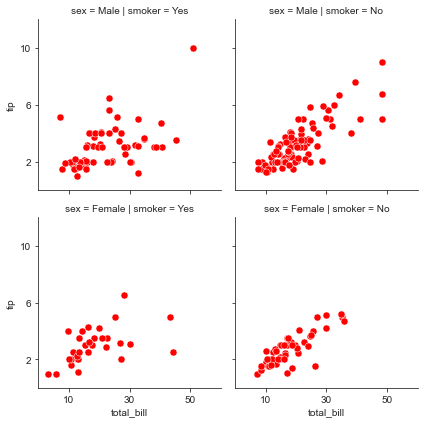

In [52]:
# Set other attributes that are shared across the facetes:
g = sns.FacetGrid(tips, col="smoker", row="sex")
g = (g.map(plt.scatter, "total_bill", "tip", color="r", **kws)
       .set(xlim=(0, 60), ylim=(0, 12),
            xticks=[10, 30, 50], yticks=[2, 6, 10]))

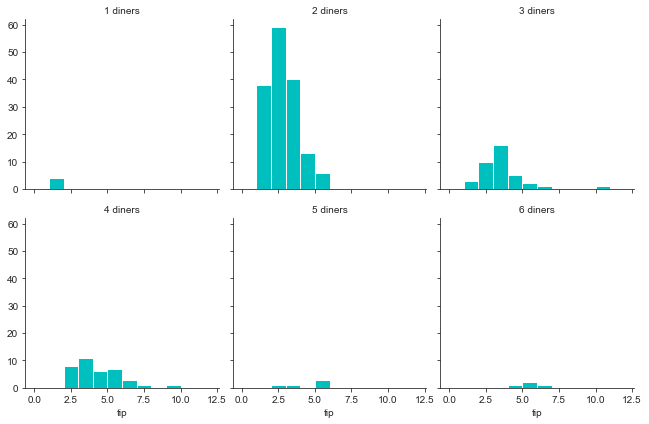

In [53]:
# Use a different template for the facet titles:
g = sns.FacetGrid(tips, col="size", col_wrap=3)
g = (g.map(plt.hist, "tip", bins=np.arange(0, 13), color="c")
       .set_titles("{col_name} diners"))


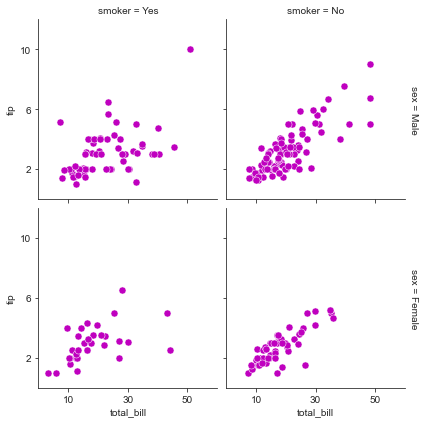

In [54]:
# Tighten the facets:
g = sns.FacetGrid(tips, col="smoker", row="sex",
                   margin_titles=True)
g = (g.map(plt.scatter, "total_bill", "tip", color="m", **kws)
       .set(xlim=(0, 60), ylim=(0, 12),
            xticks=[10, 30, 50], yticks=[2, 6, 10])
       .fig.subplots_adjust(wspace=.05, hspace=.05))

